In [29]:
from ase.calculators.espresso import Espresso, EspressoProfile
from ase.build import bulk
from ase.visualize import view
import ase
# from ase.io.espresso import read_espresso_in

In [23]:
# Fe = bulk('Fe', crystalstructure='bcc', cubic= True)

In [33]:
profile = EspressoProfile(binary='/home/gu.huang/qe/qe-7.2/bin/pw.x', pseudo_dir='/home/gu.huang/QE_project/Pseudo')

In [38]:
pp = {'Fe': 'Fe.pbe-spn-kjpaw_psl.0.2.1.UPF']
# pp = {'C': 'C.pbe-n-kjpaw_psl.1.0.0.UPF'}

In [103]:
# input_data = {
#     'calculation': 'scf',
#     'restart_mode': 'from_scratch',
#     "occupations": "smearing",
#     "degauss": 0.02,
#     "conv_thr": 1e-8,
#     "mixing_beta": 0.7,
#     "prefix": 'graphene',
#     "smearing": "mv",
#     'pseudo_dir': '/home/gu.huang/QE_project/Pseudo/',
#     "ecutwfc": 60
# }

In [104]:
# Espresso?

In [105]:
# calc = Espresso(profile=profile, pseudopotentials = pp, input_data = input_data, kpts = (3,3,3))

In [99]:
# from ase.io.espresso import write_espresso_in

In [100]:
# write_espresso_in("C.in", graphene, input_data=input_data, format="espresso-in", 
#                   pseudopotentials = pp,
#                   kpts = (10,10,1),
#                  )

In [101]:
# %rm C*

In [109]:
from ase.units import Rydberg

In [ ]:
# &IONS
# ion_dynamics='bfgs',
# /
# &CELL
# cell_dynamics='bfgs',
# press=0.0,
# press_conv_thr=0.5,
# /

1. scf calculation

In [111]:
Fe = bulk('Fe', crystalstructure='bcc', cubic=True)

In [186]:
input_data = {
    'calculation': 'scf',
    'restart_mode': 'from_scratch',
    "prefix": 'Fe_bcc',
    'pseudo_dir': '/home/gu.huang/QE_project/Pseudo/',

    "ecutwfc": 30,
    "occupations": "smearing",
    "smearing": "gaussian",
    "degauss": 0.02,
    
    "conv_thr": 1e-9,
    "mixing_beta": 0.7
}

In [187]:
pp = {'Fe': 'Fe.pbe-spn-kjpaw_psl.0.2.1.UPF'}

In [165]:
write_espresso_in("Fe.in", Fe, input_data=input_data, format="espresso-in", 
                  pseudopotentials = pp,
                  kpts = (10,10,1),
                 )

In [166]:
%pwd

'/home/gu.huang/ProjectGuojing/Codes/QE/bccFe'

In [188]:
input_data

{'calculation': 'scf',
 'restart_mode': 'from_scratch',
 'prefix': 'Fe_bcc',
 'pseudo_dir': '/home/gu.huang/QE_project/Pseudo/',
 'ecutwfc': 30,
 'occupations': 'smearing',
 'smearing': 'gaussian',
 'degauss': 0.02,
 'conv_thr': 1e-09,
 'mixing_beta': 0.7}

In [189]:
espresso = Espresso(profile=profile,
                   input_data = input_data,
                   pseudopotentials = pp,
                   kpts = [4,4,4])

In [190]:
Fe.calc = espresso

In [191]:
Fe.get_total_energy()

-8959.656417817956

In [192]:
-8959.656417817956 / Rydberg

-658.5226059264137

In [126]:
Fe.get_cell()

Cell([2.87, 2.87, 2.87])

2. ecut, kpoints convergence

In [193]:
E = []
ecut = [30, 40, 50 ,60 ,70, 80, 90 ,100]
for e in ecut:
    input_data['ecutwfc'] = e
    espresso = Espresso(profile=profile,
                   input_data = input_data,
                   pseudopotentials = pp,
                   kpts = [4,4,4],)
    Fe.calc = espresso
    try:
        ee = Fe.get_total_energy() / Rydberg
        E.append(ee)
    except:
        continue

In [194]:
E

[-658.5226059264137,
 -658.6034965299962,
 -658.5454982845976,
 -658.5293682258772,
 -658.5359819753525,
 -658.5388845351222,
 -658.5380636151873,
 -658.5374432452365]

In [195]:
import matplotlib.pylab as plt

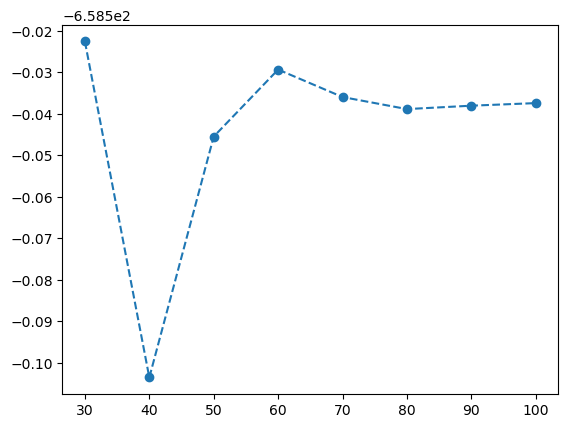

In [196]:
plt.plot(ecut, E, 'o--')

In [205]:
tol  = 5E-4
kpts = [4, 4, 4]

energy = []
Fe = bulk("Fe", crystalstructure='bcc', cubic=True)

profile = EspressoProfile(binary='/home/gu.huang/qe/qe-7.2/bin/pw.x', pseudo_dir='/home/gu.huang/QE_project/Pseudo')
pp = {'Fe': 'Fe.pbe-spn-kjpaw_psl.0.2.1.UPF'}
input_data = {
    'calculation': 'scf',
    'restart_mode': 'from_scratch',
    "prefix": 'Fe_bcc',
    'pseudo_dir': '/home/gu.huang/QE_project/Pseudo/',

    "ecutwfc": 30,
    "occupations": "smearing",
    "smearing": "gaussian",
    "degauss": 0.02,
    
    "conv_thr": 1e-9,
    "mixing_beta": 0.7
}
ecut = 30

while True:
    input_data['ecutwfc'] = ecut
    calc = Espresso(profile=profile,
                input_data=input_data,
                pseudopotentials = pp,
                kpts = [4,4,4])
    Fe.calc = calc
    e = Fe.get_total_energy()
    energy.append([ecut, e/len(Fe)/Rydberg])
    print(energy[-1])
    if len(energy) > 3:
        cutoff, e = zip(*energy[-3:])
        e1, e2, e3 = e
        if abs(e1-e3) < tol and abs(e2-e3) < tol:
            print("Convergence reached")
            break
    ecut += 10

[30, -329.26130296320684]
[40, -329.3017482649981]
[50, -329.2727491422988]
[60, -329.2646841129386]
[70, -329.2679909876762]
[80, -329.2694422675611]
[90, -329.26903180759365]
[100, -329.2687216226183]
[110, -329.2689947175966]
Convergence reached


In [207]:
cutoffs = []
energies = []
for i in range(len(energy)):
    cutoffs.append(energy[i][0])
    energies.append(energy[i][1])

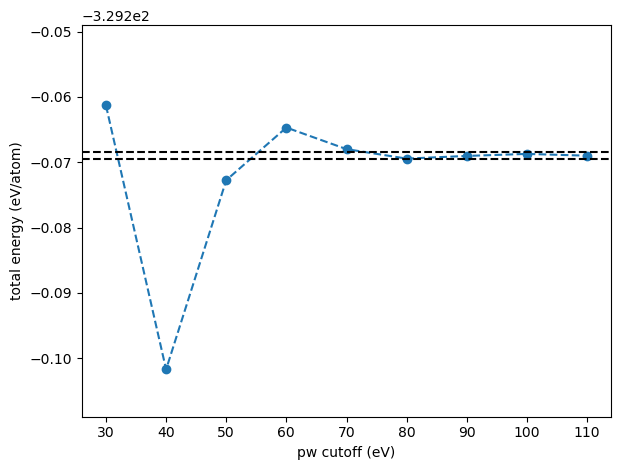

In [241]:
plt.plot(cutoffs, energies,"o--")
plt.xlabel("pw cutoff (eV)")
plt.ylabel("total energy (eV/atom)")
plt.tight_layout()
plt.ylim([energies[-1]-0.04, energies[-1]+0.02])
plt.axhline(y=energies[-1]-tol, c="k", ls="--")
plt.axhline(y=energies[-1]+tol, c="k", ls="--")

plt.show()

In [250]:
input_data['ecutwfc'] = 100
kpt = 2
kpts = []
energy = []

while True:
    calc = Espresso(profile=profile,
                input_data=input_data,
                pseudopotentials = pp,
                kpts = [kpt, kpt, kpt])
    Fe.calc = calc
    e = Fe.get_total_energy()
    energy.append([kpt, e/len(Fe)/Rydberg])
    print(energy[-1])
    if len(energy) > 3:
        k, e = zip(*energy[-3:])
        e1, e2, e3 = e
        if abs(e1-e3) < tol and abs(e2-e3) < tol:
            print("Convergence reached")
            break
    kpt+=1   

[2, -329.20270731785547]
[3, -329.2794528517669]
[4, -329.2687216226183]
[5, -329.2732486022591]
[6, -329.27227170733664]
[7, -329.272494712319]
[8, -329.2723622023295]
Convergence reached


In [251]:
kpts = []
energies = []
for i in range(len(energy)):
    kpts.append(energy[i][0])
    energies.append(energy[i][1])

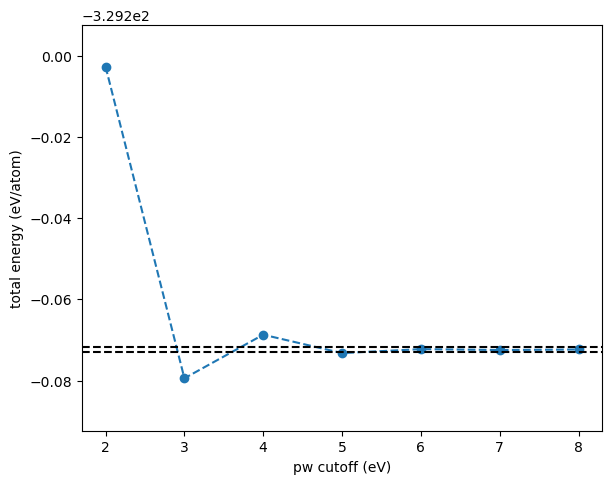

In [257]:
plt.plot(kpts, energies,"o--")
plt.xlabel("pw cutoff (eV)")
plt.ylabel("total energy (eV/atom)")
plt.tight_layout()
plt.ylim([energies[-1]-0.02, energies[-1]+0.08])
plt.axhline(y=energies[-1]-tol, c="k", ls="--")
plt.axhline(y=energies[-1]+tol, c="k", ls="--")

plt.show()

In [258]:
ecut = 100
kpts = [6, 6, 6]

3. relaxation

In [283]:
input_data.update({'calculation': 'vc-relax', 
                   'ion_dynamics': 'bfgs',
                   'cell_dynamics': 'bfgs',
                   'press': 0.0,
                   'press_conv_thr': 0.5,
                  })
input_data
calc = Espresso(
    profile=profile,
    pseudopotentials = pp,
    input_data = input_data,
    kpts = [6,6,6]
)
Fe.calc = calc

In [284]:
input_data

{'calculation': 'vc-relax',
 'restart_mode': 'from_scratch',
 'prefix': 'Fe_bcc',
 'pseudo_dir': '/home/gu.huang/QE_project/Pseudo/',
 'ecutwfc': 100,
 'occupations': 'smearing',
 'smearing': 'gaussian',
 'degauss': 0.02,
 'conv_thr': 1e-09,
 'mixing_beta': 0.7,
 'ion_dynamics': 'bfgs',
 'cell_dynamics': 'bfgs',
 'press': 0.0,
 'press_conv_thr': 0.5}

In [285]:
# Espresso?

In [286]:
from ase.optimize import BFGS

In [287]:
Fe.get_total_energy()

-8959.977175950922

In [288]:
opt = BFGS(Fe)
opt.run()

      Step     Time          Energy          fmax
BFGS:    0 15:33:57    -8959.977176        0.000000


True

In [270]:
Fe.get_cell()

2.87

In [275]:
write_espresso_in('relax.in', Fe, input_data=input_data, pseudopotentials=pp, kpts=[6,6,6],crystal_coordinates= True)

In [276]:
%pwd

'/home/gu.huang/ProjectGuojing/Codes/QE/bccFe'

In [289]:
Fe1 = Fe.copy()
Fe1.rattle(stdev = 0.1)

In [291]:
Fe1.calc = calc
Fe1.get_total_energy()

-8959.97769936189

In [292]:
opt = BFGS(Fe1)
opt.run()

      Step     Time          Energy          fmax
BFGS:    0 16:39:23    -8959.977699        0.002141


True